<a href="https://colab.research.google.com/github/SampritiMayra/Data_Analysis_prep/blob/main/Iris_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Logistic Regression on Iris Data-set

In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
#%matplotlib inline 
import numpy as np
from sklearn import datasets
import seaborn as sns


In [2]:
#Importing Dataset
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', names = ["sepal length", "sepal width", "petal length", "petal width", "class"])
iris.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#sklearn always works internally with numpy and returns numpy arrays. There is no head function for a numpy array.
iris.head(10) #This will not work

In [ ]:
iris.keys()

Index(['sepal length', 'sepal width', 'petal length', 'petal width', 'class'], dtype='object')

In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
iris.isnull().sum() #info about missing values in the dataset

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

In [ ]:
!pip install pandas-profiling[notebook,html]

Generating Dataset Report using Pandas

In [ ]:
import pandas_profiling
from pandas_profiling import ProfileReport


<ipython-input-21-20e4261384b0>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [ ]:
profile = ProfileReport(iris)
profile.to_file(output_file = "Iris_dataset.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
profile.to_notebook_iframe()

In [ ]:
iris.drop_duplicates( inplace = True)

In [ ]:
iris.shape

(147, 5)

In [ ]:
# We will split the data into training and testing data
#Slicing the columns of the dataset, we're taking all rows and columns from 0 to 4 as X i.e (features) and y is class (i.e Labels)
X = iris.iloc[:, 0:4]
Y = iris['class']
X.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
from sklearn.model_selection import train_test_split #to split the dataset for training and testing

train_x, test_x, train_y, test_y = train_test_split(X,Y,test_size=0.25,random_state=0)

train_x.shape, train_y.shape

((110, 4), (110,))

In [ ]:
# importing alll the necessary packages to Logistic Regression 
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm

In [ ]:
#Fitting the Model according to the Dataset
model = LogisticRegression()
model.fit(train_x, train_y)

LogisticRegression()

In [ ]:
y_pred = model.predict(test_x)
y_pred

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor'], dtype=object)

In [ ]:
from sklearn import metrics #for checking the model accuracy
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(y_pred,test_y))

The accuracy of the Logistic Regression is 1.0


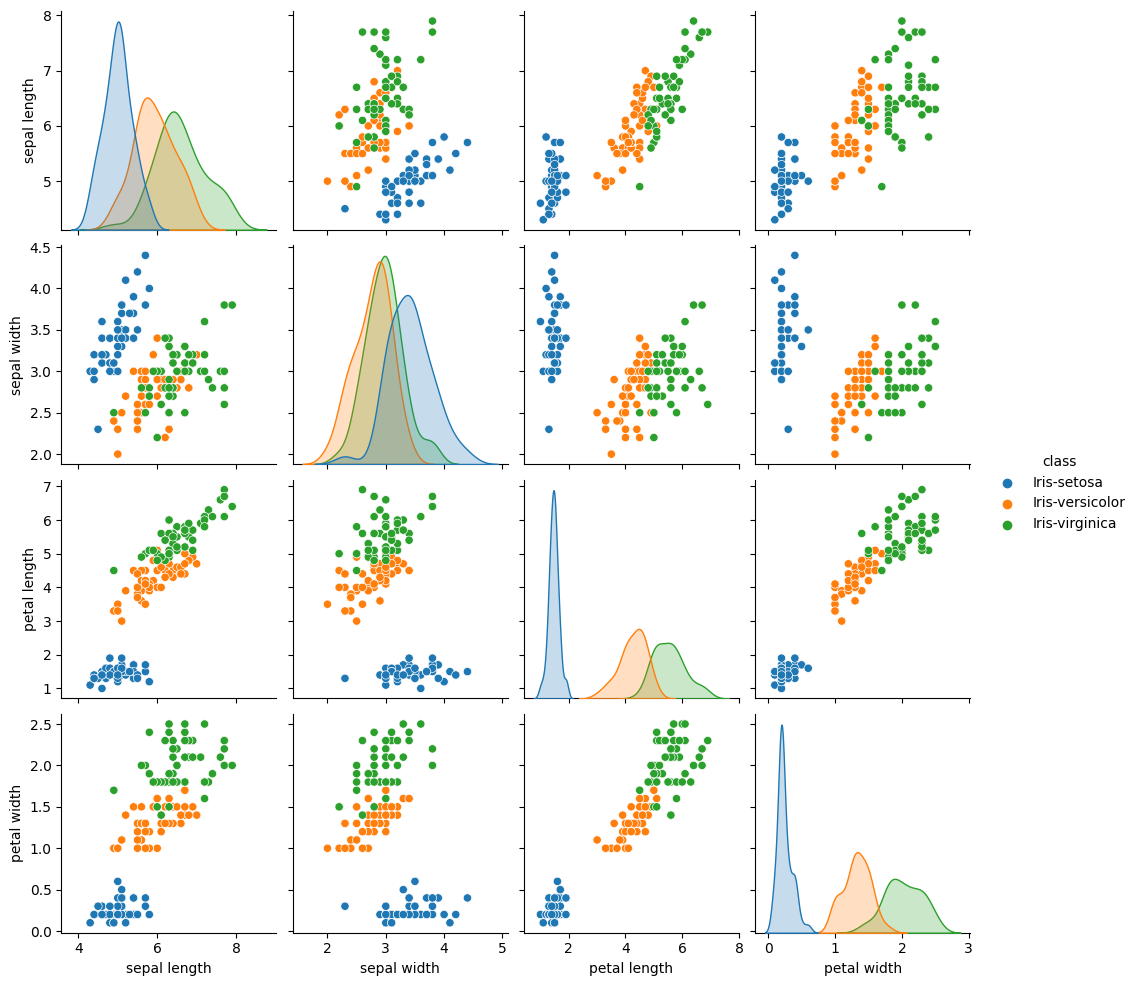

In [4]:
#let Create a pair plot of some columns 
sns.pairplot(iris.iloc[:,:],hue='class')  # graph also  tell us about the the realationship between the two columns 